In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')

## Data Loading
Source : https://www.kaggle.com/datasets/thedevastator/youtube-trending-videos-dataset



Column Descriptions:
- title: The title of the video.
- channel_title: The title of the YouTube channel that published the video.
- publish_date: The date when the video was published on YouTube.
- time_frame: The duration of time (e.g., 1 day, 6 hours) that the video has been trending on YouTube.
- published_day_of_week: The day of week (e.g., Monday) when the video was published.
- publish_country: The country where the video was published.
- tags: The tags or keywords associated with the video.
- views: The number of views received by a particular video
- likes: Number o likes received per each videos
- dislike: Number dislikes receives per an individual vidoe
- comment_count: number of comments

In [111]:
df = pd.read_csv('youtube.csv')
df

,index,video_id,trending_date,title,channel_title,category_id,publish_date,time_frame,published_day_of_week,publish_country,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,13/11/2017,17:00 to 17:59,Monday,US,SHANtell martin,748374,57527,2966.0,15954,False,False,False
1,1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,13/11/2017,7:00 to 7:59,Monday,US,"last week tonight trump presidency|""last week ...",2418783,97185,6146.0,12703,False,False,False
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,12/11/2017,19:00 to 19:59,Sunday,US,"racist superman|""rudy""""|""""mancuso""""|""""king""""|""...",3191434,146033,5339.0,8181,False,False,False
3,3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,13/11/2017,11:00 to 11:59,Monday,US,"rhett and link|""gmm""""|""""good mythical morning""...",343168,10172,666.0,2146,False,False,False
4,4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,12/11/2017,18:00 to 18:59,Sunday,US,"ryan|""higa""""|""""higatv""""|""""nigahiga""""|""""i dare ...",2095731,132235,1989.0,17518,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161465,161465,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,13/06/2018,18:00 to 18:59,Wednesday,CANADA,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99.0,1312,False,False,False
161466,161466,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,13/06/2018,19:00 to 19:59,Wednesday,CANADA,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66.0,51,False,False,False
161467,161467,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III â€“ SQUARE ENIX E3 SHOWCASE...,Kingdom Hearts,20,11/6/2018,17:00 to 17:59,Monday,CANADA,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224.0,3881,False,False,False
161468,161468,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,13/06/2018,4:00 to 4:59,Wednesday,CANADA,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182.0,1672,False,False,False


In [112]:
df = df.drop(columns=['index'])


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161470 entries, 0 to 161469
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                161470 non-null  object 
 1   trending_date           161470 non-null  object 
 2   title                   161468 non-null  object 
 3   channel_title           161470 non-null  object 
 4   category_id             161470 non-null  int64  
 5   publish_date            161470 non-null  object 
 6   time_frame              161470 non-null  object 
 7   published_day_of_week   161470 non-null  object 
 8   publish_country         161470 non-null  object 
 9   tags                    161470 non-null  object 
 10  views                   161470 non-null  int64  
 11  likes                   161470 non-null  int64  
 12  dislikes                161466 non-null  float64
 13  comment_count           161470 non-null  int64  
 14  comments_disabled   

## Data Preprocessing

In [114]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')


In [115]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%d/%m/%Y')


## Exploratory Data Analysis

### Handle Missing Value

In [116]:
df.isnull().sum()

,0
video_id,0
trending_date,0
title,2
channel_title,0
category_id,0
publish_date,0
time_frame,0
published_day_of_week,0
publish_country,0
tags,0


ada missing value di title dan dislikes, tapi karena sedikit saja yang missing maka cukup di drop saja

In [117]:
df = df.dropna(subset=['title', 'dislikes'])

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161464 entries, 0 to 161469
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                161464 non-null  object        
 1   trending_date           161464 non-null  datetime64[ns]
 2   title                   161464 non-null  object        
 3   channel_title           161464 non-null  object        
 4   category_id             161464 non-null  int64         
 5   publish_date            161464 non-null  datetime64[ns]
 6   time_frame              161464 non-null  object        
 7   published_day_of_week   161464 non-null  object        
 8   publish_country         161464 non-null  object        
 9   tags                    161464 non-null  object        
 10  views                   161464 non-null  int64         
 11  likes                   161464 non-null  int64         
 12  dislikes                161464 non-

### Handle Duplicated Data

In [119]:
print("Jumlah data duplikat :",df.duplicated().sum())

Jumlah data duplikat : 220


ada total 220 data duplikat

In [120]:
df = df.drop_duplicates()
print("Jumlah data duplikat :",df.duplicated().sum())


Jumlah data duplikat : 0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161244 entries, 0 to 161469
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                161244 non-null  object        
 1   trending_date           161244 non-null  datetime64[ns]
 2   title                   161244 non-null  object        
 3   channel_title           161244 non-null  object        
 4   category_id             161244 non-null  int64         
 5   publish_date            161244 non-null  datetime64[ns]
 6   time_frame              161244 non-null  object        
 7   published_day_of_week   161244 non-null  object        
 8   publish_country         161244 non-null  object        
 9   tags                    161244 non-null  object        
 10  views                   161244 non-null  int64         
 11  likes                   161244 non-null  int64         
 12  dislikes                161244 non-

skrg data sudah bersih

In [122]:
df.describe()

,trending_date,category_id,publish_date,views,likes,dislikes,comment_count
count,161244,161244.000000,161244,1.612440e+05,1.612440e+05,1.612440e+05,1.612440e+05
mean,2018-02-26 02:44:34.346952448,19.462622,2018-02-11 09:51:21.848626688,2.416082e+06,6.557780e+04,3.484299e+03,7.027479e+03
min,2017-11-14 00:00:00,1.000000,2006-07-23 00:00:00,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-01-03 00:00:00,15.000000,2017-12-29 00:00:00,1.013032e+05,1.970000e+03,8.500000e+01,2.780000e+02
50%,2018-02-25 00:00:00,23.000000,2018-02-19 00:00:00,3.837580e+05,9.821500e+03,3.480000e+02,1.143000e+03
75%,2018-04-22 00:00:00,24.000000,2018-04-16 00:00:00,1.336870e+06,4.002100e+04,1.348000e+03,4.137000e+03
max,2018-06-14 00:00:00,44.000000,2018-06-14 00:00:00,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06
std,NaN,7.431565,NaN,1.043056e+07,2.258497e+05,3.115968e+04,3.403533e+04


## Data Analysis

### Total Video

In [123]:
print(df['video_id'].value_counts().sum())

161244


### Trending

In [124]:
print("Tanggal trending pertama:", df['trending_date'].min())
print("Tanggal trending terakhir:", df['trending_date'].max())

Tanggal trending pertama: 2017-11-14 00:00:00
Tanggal trending terakhir: 2018-06-14 00:00:00


### Channel Title

In [125]:
print("Jumlah Konten Kreator/ Channel :",len(df['channel_title'].unique()))


Jumlah Konten Kreator/ Channel : 12361


In [126]:
df['channel_title'].value_counts().head()

,count
channel_title,
The Late Show with Stephen Colbert,651
Late Night with Seth Meyers,590
TheEllenShow,583
The Tonight Show Starring Jimmy Fallon,567
Jimmy Kimmel Live,556


### Trending Duration

In [127]:
df['time_frame'].value_counts().head()

,count
time_frame,
16:00 to 16:59,16450
17:00 to 17:59,15120
15:00 to 15:59,12471
18:00 to 18:59,10390
14:00 to 14:59,9655


### Date Uploaded

In [128]:
df['publish_date'].value_counts().head()

,count
publish_date,
2017-12-20,1307
2018-01-29,1268
2018-02-15,1204
2018-02-05,1150
2017-11-15,1143


In [129]:
df['published_day_of_week'].value_counts().head()

,count
published_day_of_week,
Friday,28575
Thursday,25758
Wednesday,25425
Tuesday,23945
Monday,23419


### Country

In [130]:
df['publish_country'].value_counts().head()

,count
publish_country,
US,40896
CANADA,40879
FRANCE,40724
GB,38745


### Views

In [131]:
print("Video dengan views terbanyak mencapai",df['views'].max(), "views")

Video dengan views terbanyak mencapai 424538912 views


In [132]:
print("Video dengan views paling sedikit mencapai",df['views'].min(), "views")

Video dengan views paling sedikit mencapai 223 views


In [133]:
high_views = df.sort_values('views', ascending=False)
high_views = high_views.drop_duplicates(subset='title', keep='first')
top10_views = high_views.nlargest(5, 'views')
top10_views[['title', 'channel_title', 'publish_country', 'views']]



,title,channel_title,publish_country,views
69361,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,GB,424538912
75409,"Te Bote Remix - Casper, Nio GarcÃ­a, Darell, N...",Flow La Movie,GB,337621571
66494,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,GB,328860380
62111,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,GB,288811992
79350,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,GB,259721696


In [134]:
low_views = df.sort_values('views', ascending=True)
low_views = low_views.drop_duplicates(subset='title', keep='first')
bottom10_views = low_views.nsmallest(10, 'views')
bottom10_views[['title', 'channel_title', 'publish_country', 'views']]


,title,channel_title,publish_country,views
98184,Laurent Baffie - Best of des vannes #105 [inÃ©...,okaminaTv 4,FRANCE,223
99531,Zemmour et Naulleau - 21 FÃ©vrier 2018 - Emiss...,Politika France,FRANCE,274
103725,France: Famous climber Alain Rober scales skys...,No Comment TV,FRANCE,284
100880,L'histoire des enfants Tinning | La mÃ¨re aux ...,NavylittleMonster,FRANCE,365
100974,"FeÌvrier 2018, Performance 8 10 Ans",Melimelo78,FRANCE,374
98170,La chanson de nos 14 ans (15/02/2018) - Best O...,BrunoDansLaRadio,FRANCE,385
112122,2/2 â© Coffret de communication : Les RJ45 ST...,TAKA YAKA,FRANCE,404
96939,JO 2018 - Perrine Laffont prend la tÃªte des q...,France tv sport,FRANCE,412
98196,"MaÃ«lys est morte, tuÃ©e par Nordahl Lelandais...",L'Obs,FRANCE,460
100966,Montpellier toujours sous la neige,France Bleu,FRANCE,472


### Likes & Dislikes

In [135]:
print("Video dengan Likes terbanyak mencapai",df['likes'].max(), "Likes")

Video dengan Likes terbanyak mencapai 5613827 Likes


In [136]:
likes = df.sort_values('likes', ascending=False)
likes = likes.drop_duplicates(subset='title', keep='first')
top5_likes = likes.nlargest(5, 'likes')
top5_likes[['title', 'channel_title', 'publish_country', 'likes']]



,title,channel_title,publish_country,likes
77587,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,GB,5613827
79350,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,GB,5444541
66885,Drake - Godâ€™s Plan,DrakeVEVO,GB,4737873
66494,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,GB,3823879
76669,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,GB,3394437


In [137]:
print("Video dengan Dislikes terbanyak mencapai",df['dislikes'].max(), "DisLikes")

Video dengan Dislikes terbanyak mencapai 1944971.0 DisLikes


In [138]:
dislikes = df.nlargest(5, 'dislikes')
dislikes = dislikes.drop_duplicates(subset=['title'], keep='first')
dislikes[['title','channel_title','publish_country', 'dislikes']]


,title,channel_title,publish_country,dislikes
53733,So Sorry.,Logan Paul Vlogs,GB,1944971.0


In [139]:
dislikes = df.sort_values('dislikes', ascending=False)
dislikes = dislikes.drop_duplicates(subset='title', keep='first')

top5_dislikes = dislikes.nlargest(5, 'dislikes')

top5_dislikes[['title', 'channel_title', 'publish_country', 'dislikes']]


,title,channel_title,publish_country,dislikes
53733,So Sorry.,Logan Paul Vlogs,GB,1944971.0
49138,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,GB,1753274.0
57259,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,GB,545595.0
123487,Jake Paul - It's Everyday Bro (Remix) [feat. G...,Jake Paul,CANADA,504340.0
61718,Lucas Lucco e Pabllo Vittar - ParaÃ­so,Lucas Lucco,GB,421473.0


### Comments

In [140]:
print("Video dengan Komen terbanyak mencapai",df['comment_count'].max(), "Komen")

Video dengan Komen terbanyak mencapai 1626501 Komen


In [141]:
high_comments = df.sort_values('comment_count', ascending=False)
high_comments = high_comments.drop_duplicates(subset='title', keep='first')
top5_comments = high_comments.nlargest(5, 'comment_count')

top5_comments[['title', 'channel_title', 'publish_country', 'comment_count']]


,title,channel_title,publish_country,comment_count
53733,So Sorry.,Logan Paul Vlogs,GB,1626501
77587,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'FAKE LOVE' Official MV,ibighit,GB,1228655
49138,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,GB,845233
57259,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,GB,704824
45306,BTS (ë°©íƒ„ì†Œë…„ë‹¨) 'MIC Drop (Steve Aoki Re...,ibighit,GB,559197


In [142]:
low_comments = df.sort_values('comment_count', ascending=True)
low_comments = low_comments.drop_duplicates(subset='title', keep='first')
bottom5_comments = low_comments.nsmallest(5, 'comment_count')

bottom5_comments[['title', 'channel_title', 'publish_country', 'comment_count']]



,title,channel_title,publish_country,comment_count
131455,"Watch Live: The National for Friday January 5,...",The National,CANADA,0
84451,JoeyStarr & Philippe Manoeuvre - On n'est pas ...,On n'est pas couchÃ©,FRANCE,0
84458,"Macron Ã Alger : Attentes des uns, indiffÃ©re...",Al Magharibia Channel,FRANCE,0
84434,Bienvenue sur le culte en direct de La Porte O...,La Porte Ouverte,FRANCE,0
41494,Post Malone - rockstar ft. 21 Savage (Official...,Republic Records,GB,0


### Youtube Problems

In [143]:
print(df['comments_disabled'].value_counts())
print('\n')
print(df['ratings_disabled'].value_counts())
print('\n')
print(df['video_error_or_removed'].value_counts())

comments_disabled
False    158461
True       2783
Name: count, dtype: int64


ratings_disabled
False    159821
True       1423
Name: count, dtype: int64


video_error_or_removed
False    161107
True        137
Name: count, dtype: int64


### Handling Outlier

Outliers in views:
           views
2        3191434
32      17158531
53       9548677
67       3358068
69       7224515
...          ...
161332   3854712
161338   6891734
161386   4986664
161417  19472216
161446  16256855

[20425 rows x 1 columns]



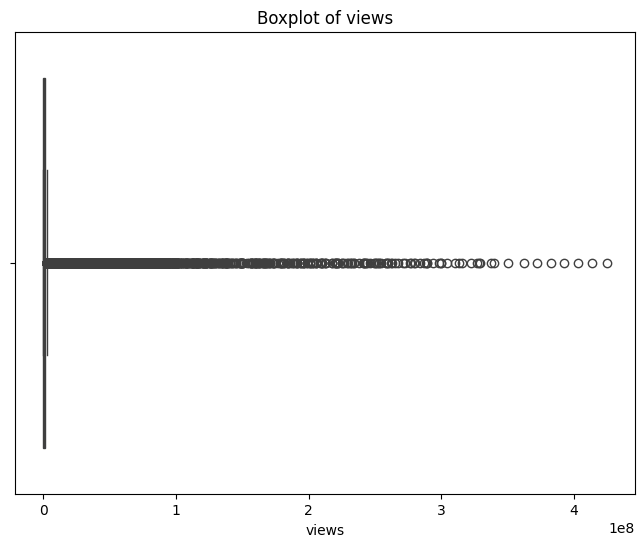

Outliers in likes:
         likes
1        97185
2       146033
4       132235
12      114188
32      787419
...        ...
161348  214518
161386  518240
161396  121587
161417  309752
161446  321798

[22392 rows x 1 columns]



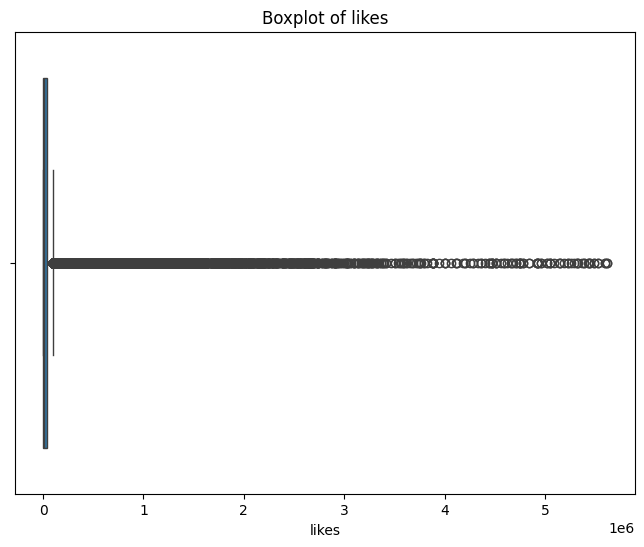

Outliers in dislikes:
        dislikes
1         6146.0
2         5339.0
32       43420.0
43       15448.0
53       15015.0
...          ...
161388    3303.0
161411    3674.0
161417   10303.0
161424    4394.0
161446   14006.0

[21919 rows x 1 columns]



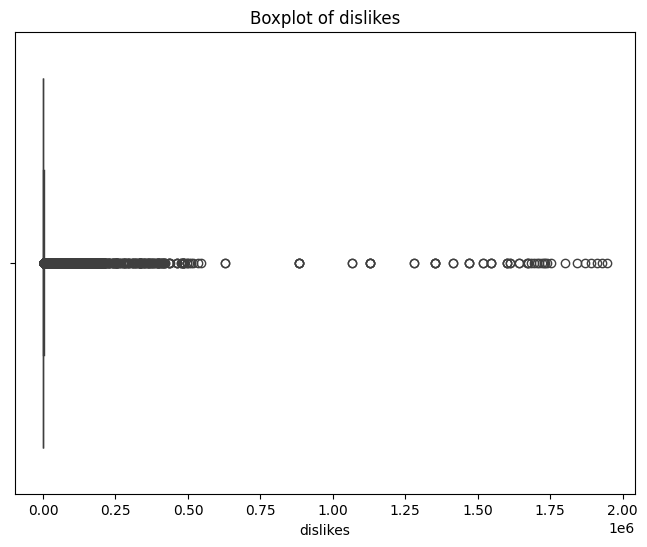

Outliers in comment_count:
        comment_count
0               15954
1               12703
4               17518
32             125882
50              11800
...               ...
161417          21731
161430          20213
161446          20453
161453          17165
161454          21316

[21413 rows x 1 columns]



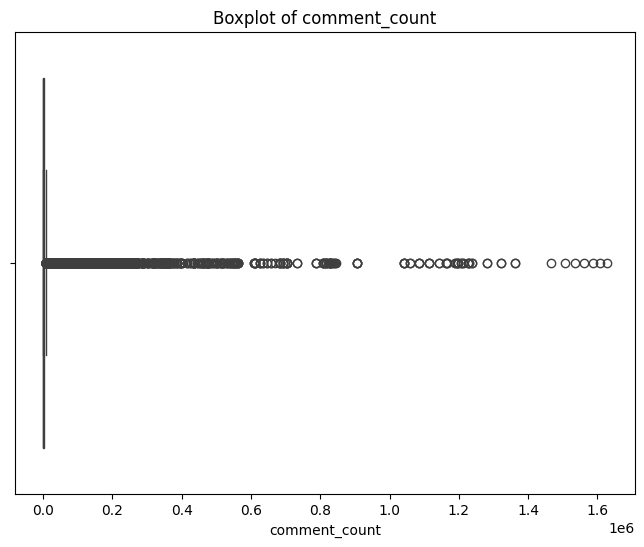

In [144]:
numerical_cols = ['views', 'likes', 'dislikes', 'comment_count']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:\n{outliers[[col]]}\n")

    # Visualization of outliers (optional)
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


ada beberapa outlier untuk kolom numerikal, sehingga perlu untuk diatasi

In [145]:
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [146]:
df_cleaned = df.copy()
outliers_summary = {}

[views] Jumlah outlier: 13595


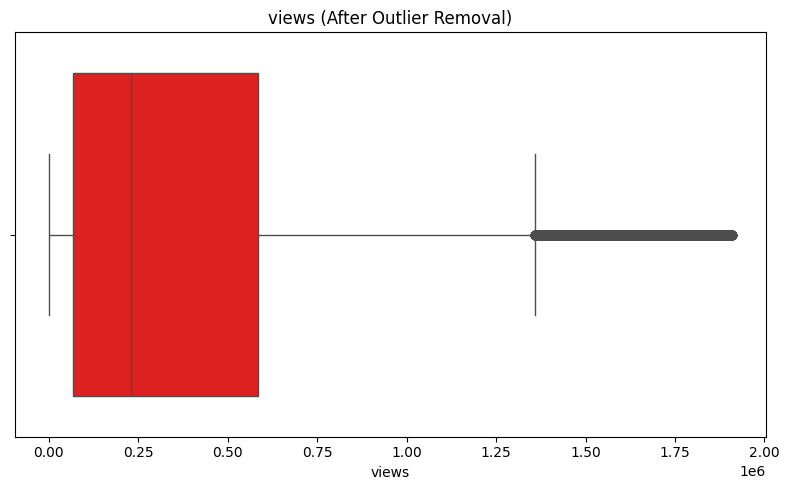

[likes] Jumlah outlier: 14263


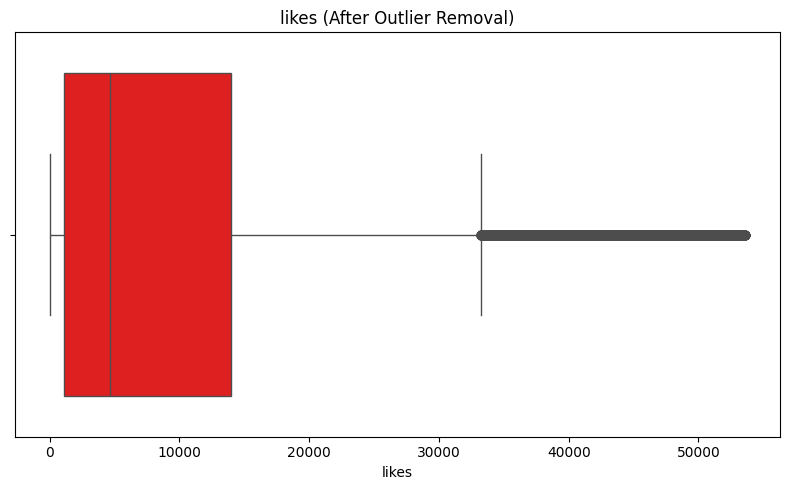

[dislikes] Jumlah outlier: 14700


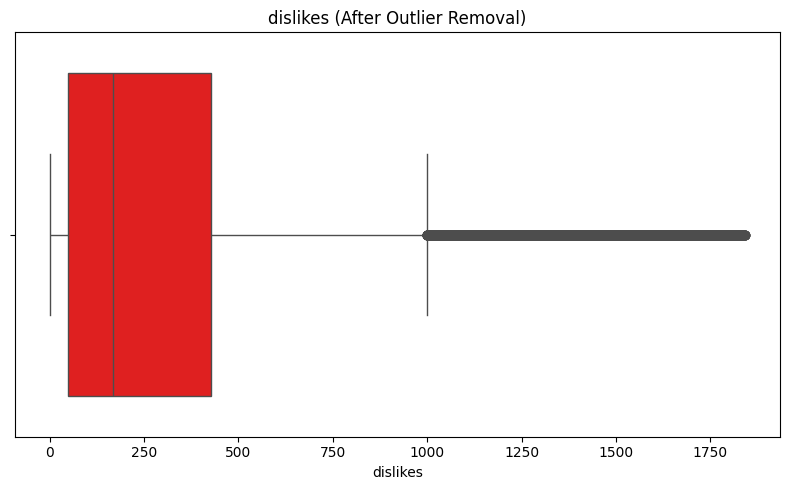

[comment_count] Jumlah outlier: 11064


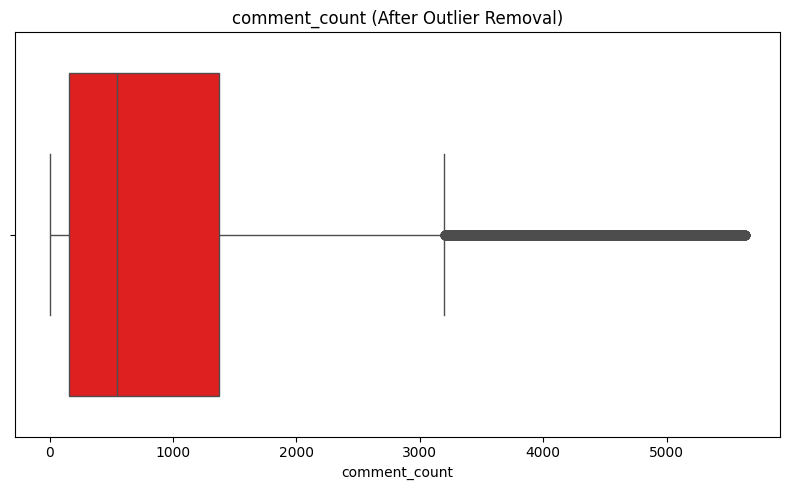


Informasi Data Setelah Penghapusan Outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 112402 entries, 3 to 161469
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                112402 non-null  object        
 1   trending_date           112402 non-null  datetime64[ns]
 2   title                   112402 non-null  object        
 3   channel_title           112402 non-null  object        
 4   category_id             112402 non-null  int64         
 5   publish_date            112402 non-null  datetime64[ns]
 6   time_frame              112402 non-null  object        
 7   published_day_of_week   112402 non-null  object        
 8   publish_country         112402 non-null  object        
 9   tags                    112402 non-null  object        
 10  views                   112402 non-null  int64         
 11  likes                   112402 non-null  int64    

In [147]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Deteksi outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_summary[col] = outliers

    print(f"[{col}] Jumlah outlier: {len(outliers)}")

    # Simpan versi yang dibersihkan (tanpa outliers) hanya untuk kebutuhan tertentu
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

    # Visualisasi boxplot sebelum dan sesudah
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_cleaned[col], color='red')
    plt.title(f'{col} (After Outlier Removal)')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

print("\nInformasi Data Setelah Penghapusan Outliers:")
print(df_cleaned.info())

df_transformed = df.copy()
for col in numerical_cols:
    df_transformed[col] = np.log1p(df_transformed[col])  # log(1 + x)

## Data Visualization

In [148]:
youtube_palette = ['#FF0000', '#282828', '#000000', '#E0E0E0']

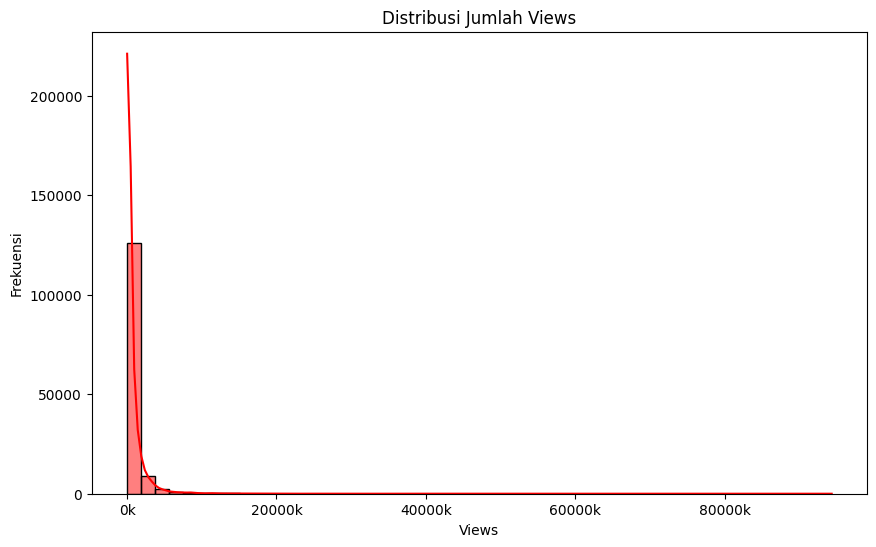

In [149]:
plt.figure(figsize=(10, 6))
sns.histplot(df['views'], bins=50, kde=True, color=youtube_palette[0])
plt.title('Distribusi Jumlah Views')
plt.xlabel('Views')
plt.ylabel('Frekuensi')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e3)}k'))
plt.show()




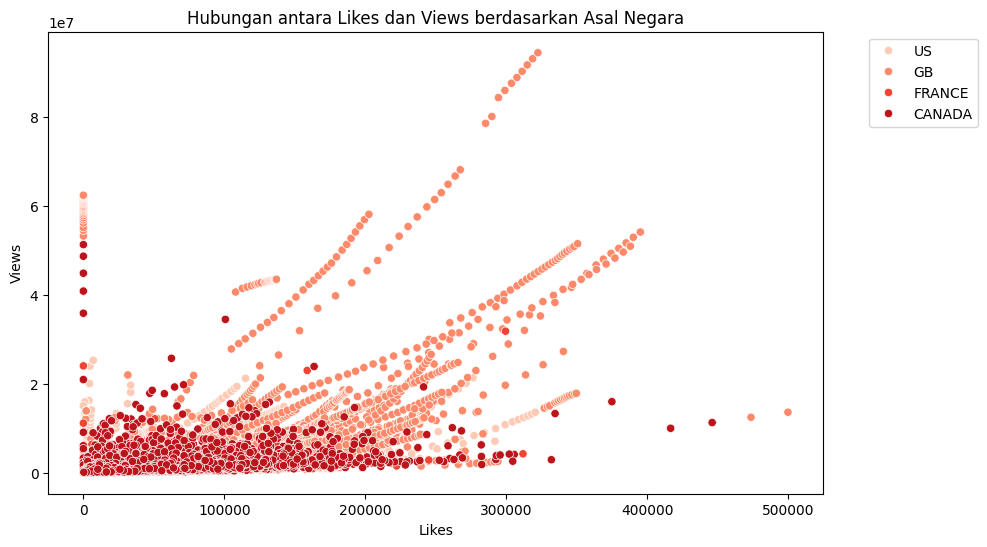

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='likes', y='views', hue='publish_country', palette='Reds')
plt.title('Hubungan antara Likes dan Views berdasarkan Asal Negara')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


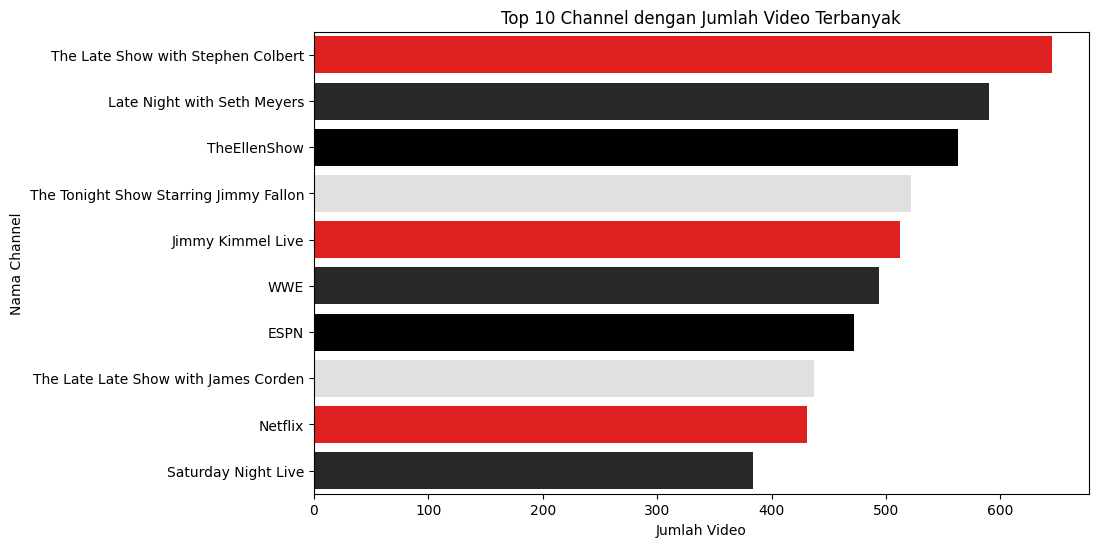

In [151]:
top_channels = df['channel_title'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette=youtube_palette)
plt.title('Top 10 Channel dengan Jumlah Video Terbanyak')
plt.xlabel('Jumlah Video')
plt.ylabel('Nama Channel')
plt.show()


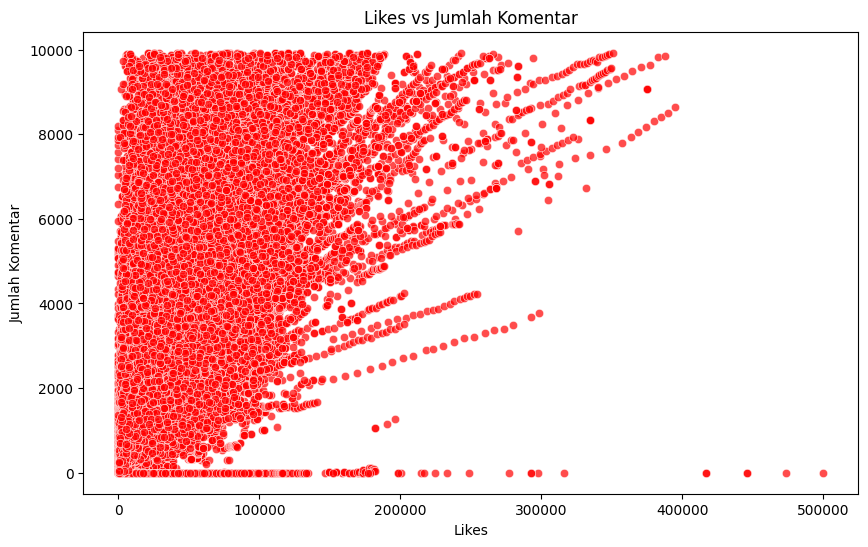

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='likes', y='comment_count', color='#FF0000', alpha=0.7)
plt.title('Likes vs Jumlah Komentar')
plt.xlabel('Likes')
plt.ylabel('Jumlah Komentar')
plt.show()


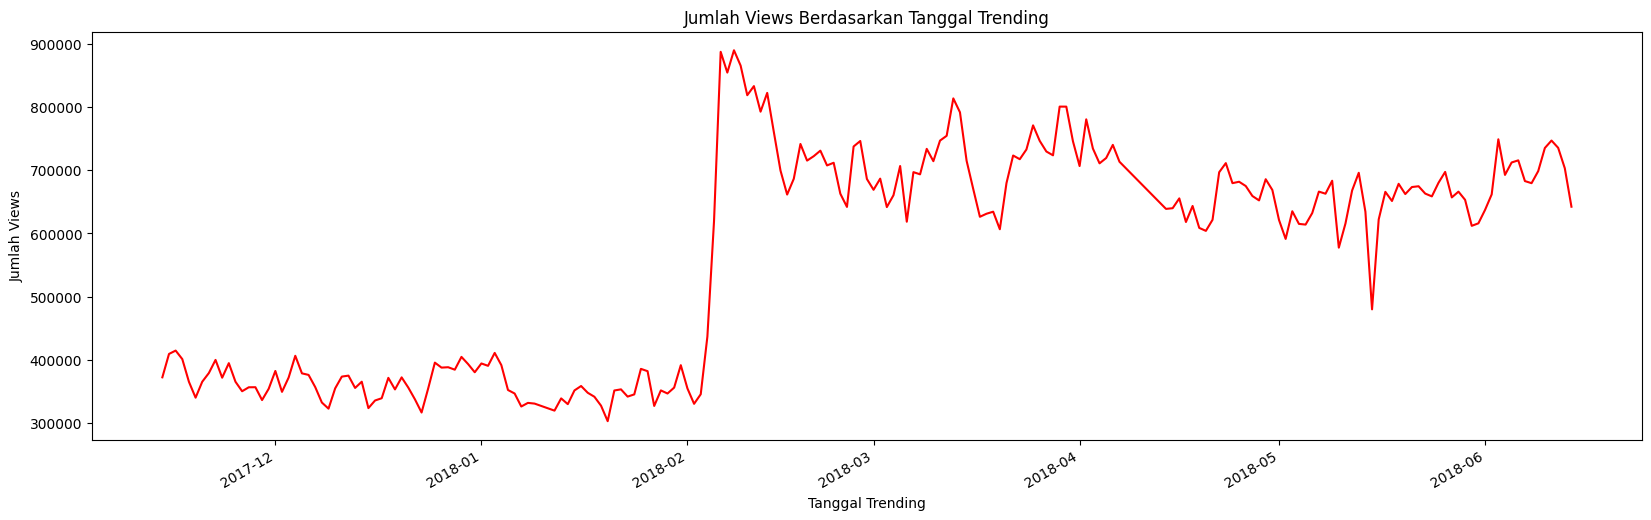

In [154]:
df.groupby('trending_date')['views'].sum().div(1000).plot(kind='line', figsize=(20,6), color = '#FF0000')
plt.title('Jumlah Views Berdasarkan Tanggal Trending')
plt.xlabel('Tanggal Trending')
plt.ylabel('Jumlah Views')
plt.show()


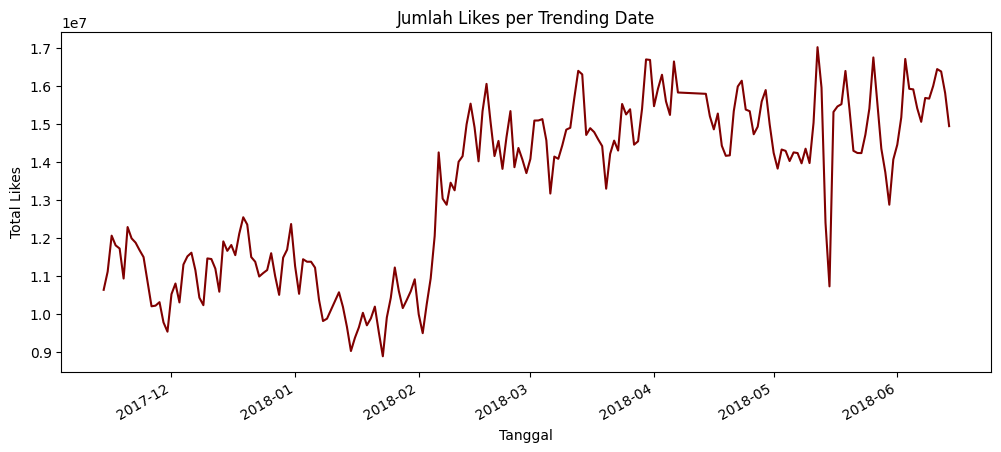

In [155]:
likes_by_date = df.groupby('trending_date')['likes'].sum()
likes_by_date.plot(figsize=(12, 5), color='maroon', title='Jumlah Likes per Trending Date')
plt.xlabel('Tanggal')
plt.ylabel('Total Likes')
plt.show()

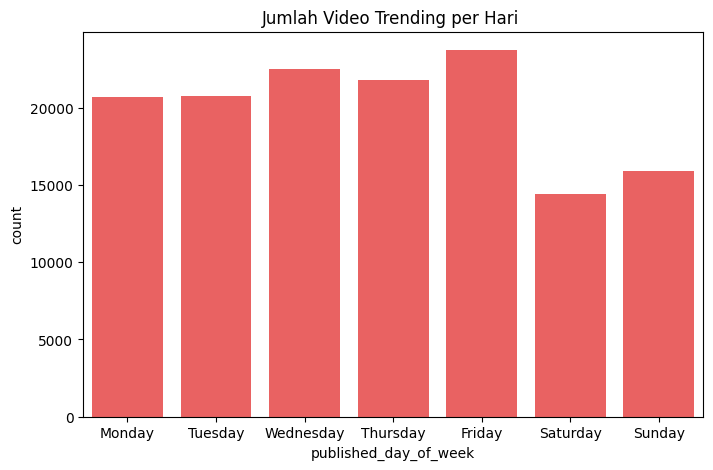

In [156]:
plt.figure(figsize=(8, 5))
sns.countplot(x='published_day_of_week', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], color = '#FF4C4C')
plt.title("Jumlah Video Trending per Hari ")
plt.show()

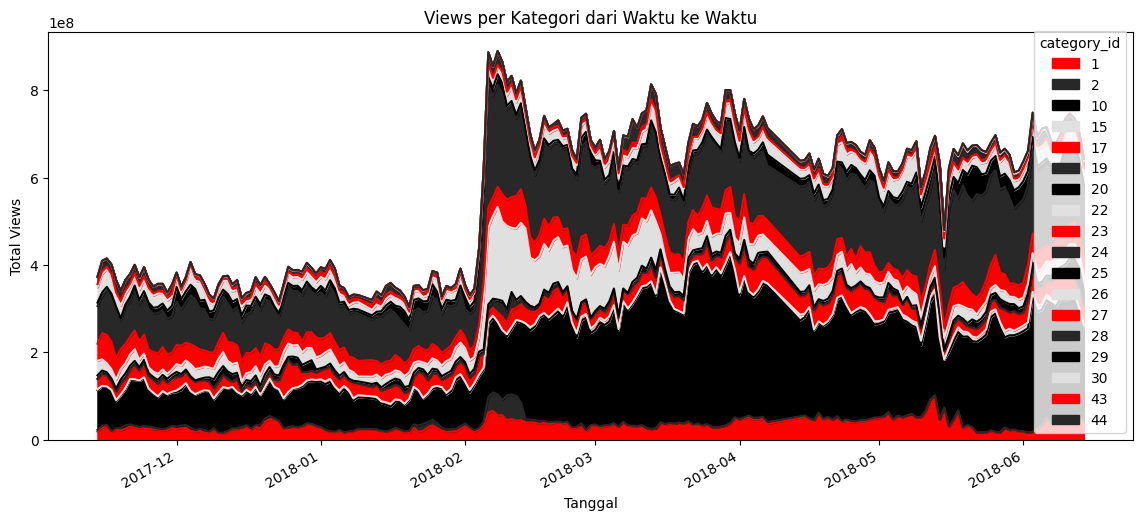

In [157]:
pivot_df = df.groupby(['trending_date', 'category_id'])['views'].sum().unstack().fillna(0)
pivot_df.plot.area(stacked=True, figsize=(14, 6), title='Views per Kategori dari Waktu ke Waktu', color = youtube_palette) # Use 'color' instead of 'palette'
plt.ylabel("Total Views")
plt.xlabel("Tanggal")
plt.show()

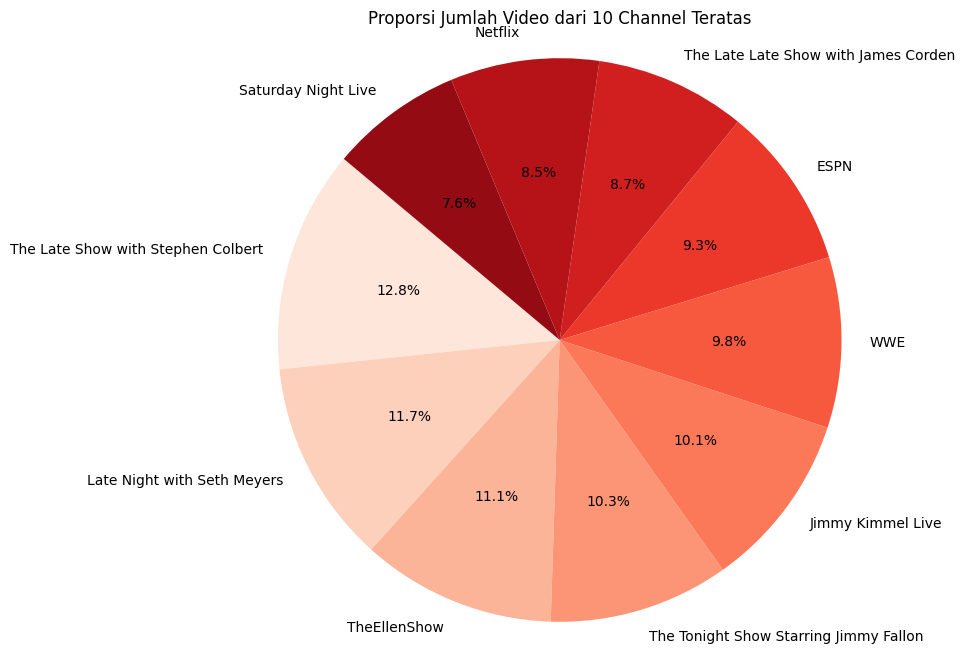

In [158]:
top10_channels = df['channel_title'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top10_channels, labels=top10_channels.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Reds", n_colors=10))
plt.title("Proporsi Jumlah Video dari 10 Channel Teratas")
plt.axis('equal')
plt.show()

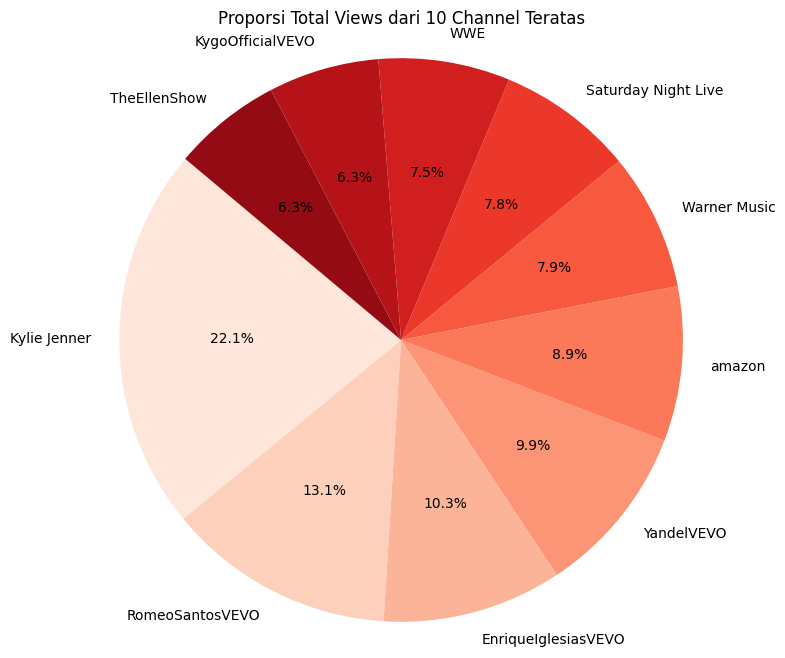

In [159]:
top_views_channels = df.groupby('channel_title')['views'].sum().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_views_channels, labels=top_views_channels.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette("Reds", n_colors=10))
plt.title("Proporsi Total Views dari 10 Channel Teratas")
plt.axis('equal')
plt.show()


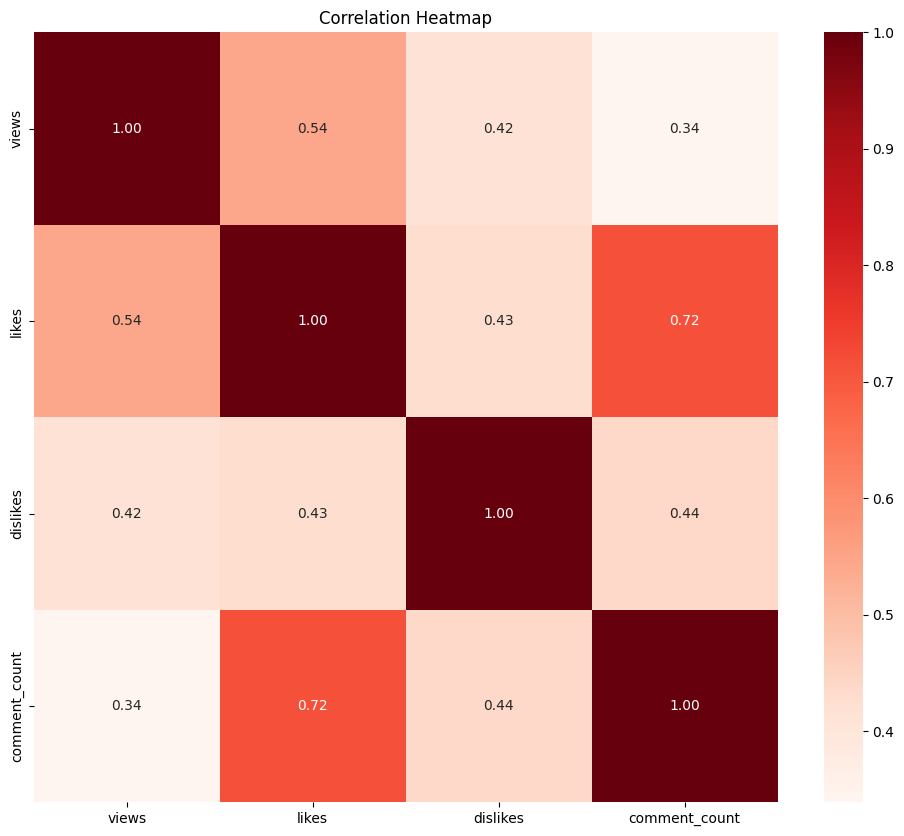

In [160]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
